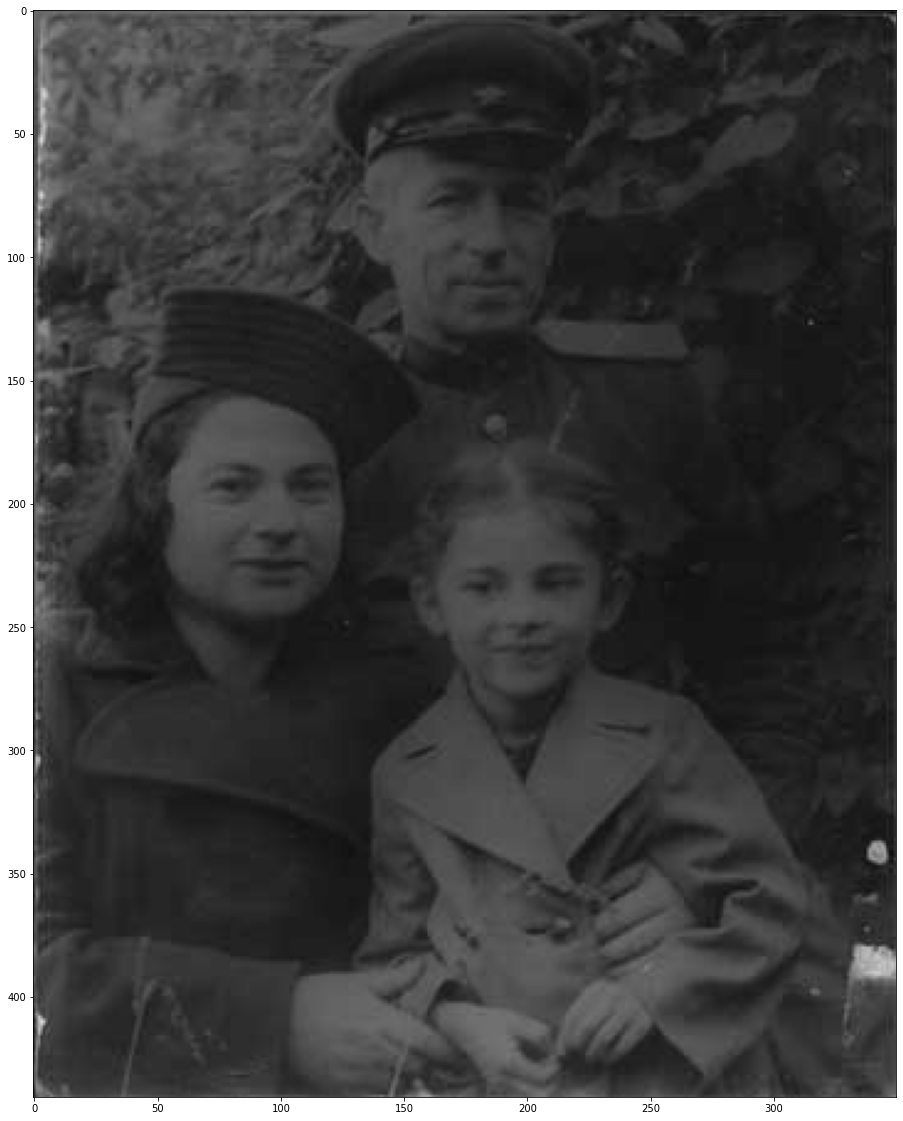

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from tqdm.notebook import tqdm
import random
plt.rcParams['figure.figsize'] = [15,8]

uploaded = files.upload()

# Read original image [Copy Path from ibrary first]
img=cv2.imread("/content/war-time-1.jpg")
plt.figure(figsize=(20,20))   #Plot image of size 20x20
plt.imshow(img, cmap="gray")


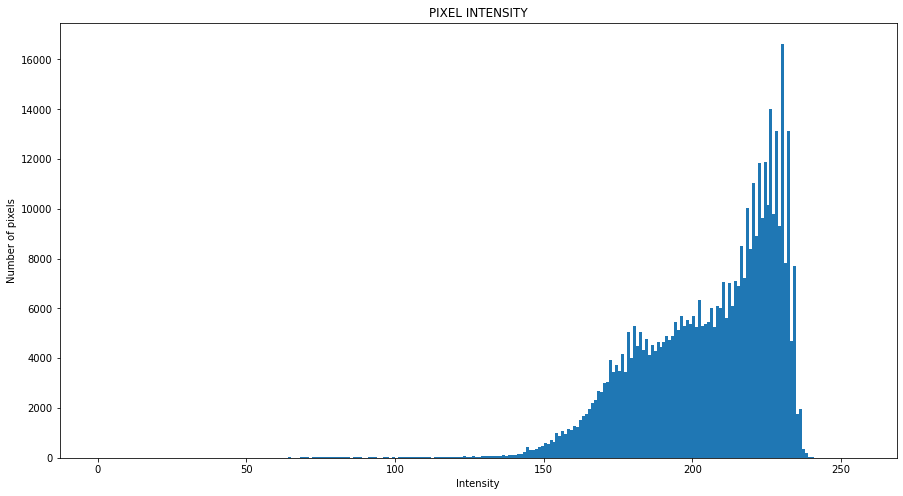

In [85]:
# Convert the image to a numpy array
pic_2d = (np.round(np.array(img)*255)).astype(np.uint8)
# flatten the image array 
pic_2d = pic_2d.flatten()
# Visualize a histogram representing pixel intensities
plt.hist(pic_2d, bins = 256, range = [0,256])
plt.title("PIXEL INTENSITY")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()

<function matplotlib.pyplot.show>

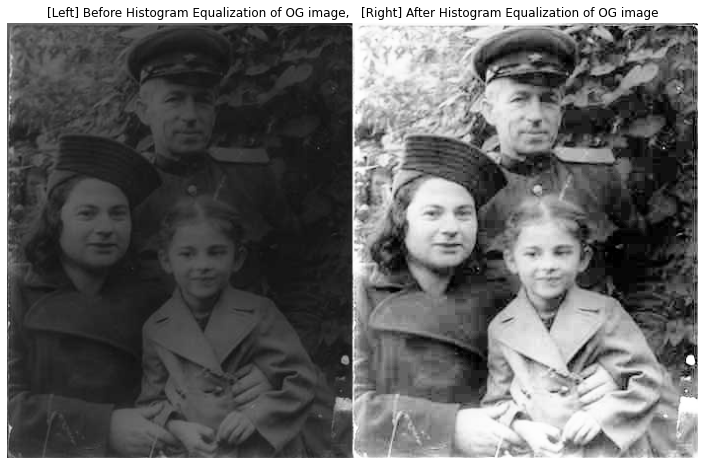

In [86]:
def histogram_equalization_1channel(img):
    #Histogram Equalization of 1-Channel images
    equalized_histo_pic = cv2.equalizeHist((img*255).astype(np.uint8))
    return equalized_histo_pic

def histogram_equalization_3channel(img):
    #Histogram Equalization of 3-Channel images
    equalized_histo_pic_R = cv2.equalizeHist(img[:,:,0])
    equalized_histo_pic_G = cv2.equalizeHist(img[:,:,1])
    equalized_histo_pic_B = cv2.equalizeHist(img[:,:,2])
    return cv2.merge((equalized_histo_pic_R,equalized_histo_pic_G,equalized_histo_pic_B))

if(len(img.shape)<3): #Check if image is RGB
  equalized_histo_pic = histogram_equalization_1channel(img)
else:
  equalized_histo_pic = histogram_equalization_3channel(img)
compare_res = np.concatenate((img, equalized_histo_pic),axis=1)
plt.imshow(compare_res);plt.axis('off');
plt.title('[Left] Before Histogram Equalization of OG image,   [Right] After Histogram Equalization of OG image')
plt.show

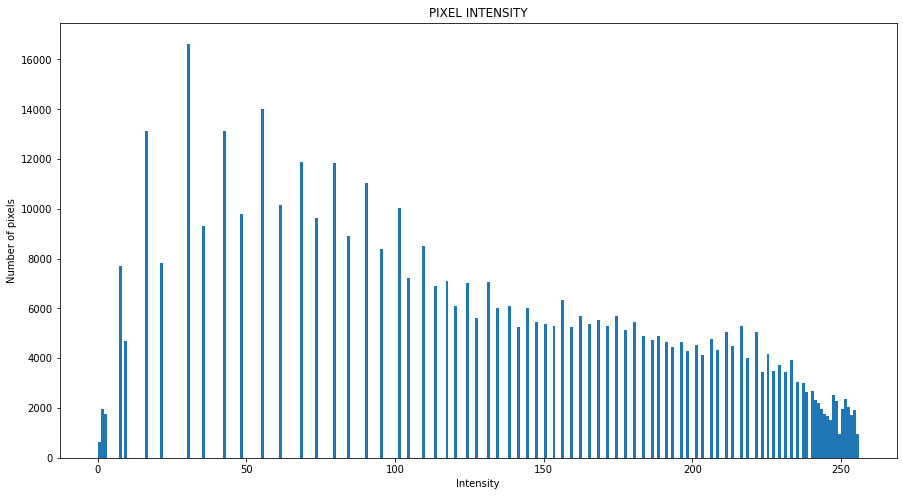

In [87]:
#To compare pixel intensity of the equalized image from the original image
histo_2d = np.array(equalized_histo_pic)
histo_2d = histo_2d.flatten()
plt.hist(histo_2d, bins = 256, range = [0,256])
plt.title("PIXEL INTENSITY")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()

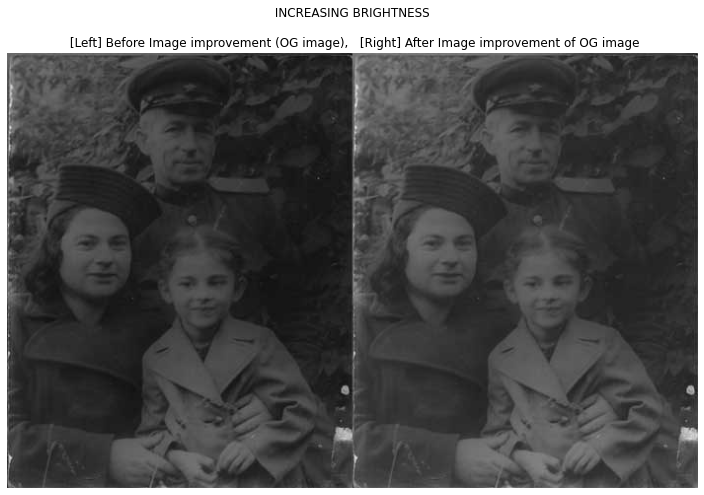

In [88]:
def picture_process(pic, ctst=1, b=15): # Increase constrast and brightness of images
    new_pic= cv2.addWeighted(pic, ctst, pic, 0, b)
    return new_pic

new_pic = picture_process(img)
compare_res = np.concatenate((img, new_pic), axis=1)
plt.imshow(compare_res);plt.axis('off');
plt.title(' INCREASING BRIGHTNESS \n\n [Left] Before Image improvement (OG image),   [Right] After Image improvement of OG image')
plt.show();



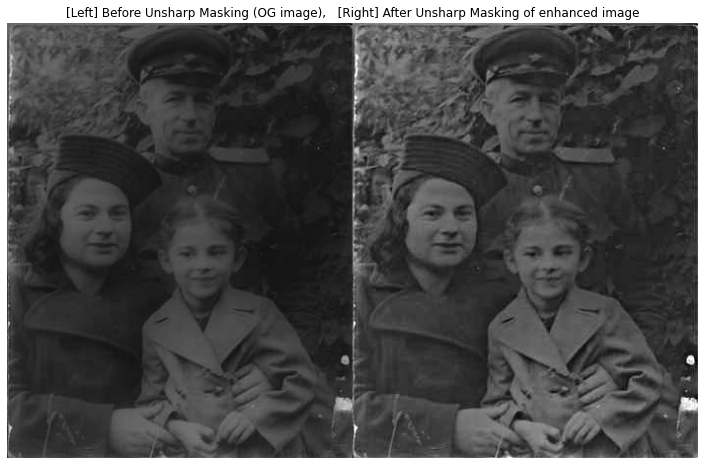

In [89]:
'''
Unsharp Masking technique is implemented to enhance the high frequency features of the improved image. This technique is executed by removing the gaussian filter from the picture.
'''
def masking_picture(pic):
    gb_pic = cv2.GaussianBlur(pic, (21,21), 10.0)
    return cv2.addWeighted(pic, 1.8, gb_pic, -0.8, 0, pic)

new_pic = picture_process(img)
pic_masked = masking_picture(new_pic.copy())
compare_res = np.concatenate((img, pic_masked),axis=1)
plt.imshow(compare_res);plt.axis('off');
plt.title('[Left] Before Unsharp Masking (OG image),   [Right] After Unsharp Masking of enhanced image')
plt.show();

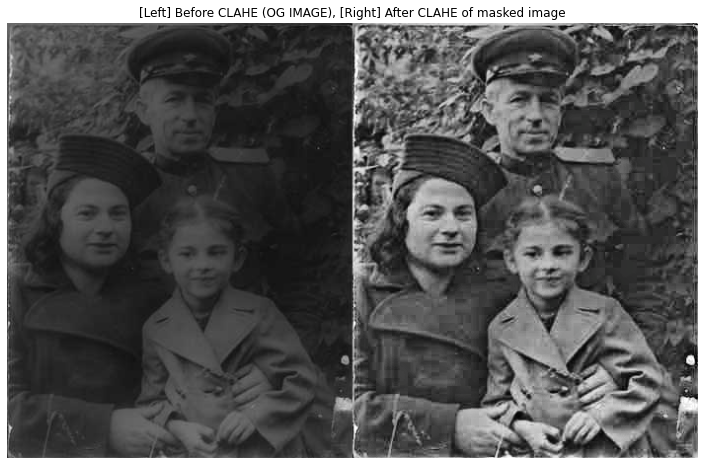

In [90]:
def create_clahe_1channel(pic):
  mod = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  pic_mod = mod.apply((pic*255).astype(np.uint8))
  return pic_mod

def create_clahe_3channel(pic):
  pic_l_a_b = cv2.cvtColor(pic, cv2.COLOR_BGR2LAB)   #CONVERT TO LAB first (LAB= Lightness, a and b stands for opposite colors green-red and blue-yellow)
  arr_pic = cv2.split(pic_l_a_b)
  mod = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))    
  arr_pic[0] = mod.apply(arr_pic[0])    
  pic_l_a_b = cv2.merge(arr_pic)
  mod_3channel = cv2.cvtColor(pic_l_a_b, cv2.COLOR_LAB2BGR)  #convert back to rgb
  return mod_3channel
'''
img=cv2.imread("/content/newimg.jpg")
img = enhance_image(img)
'''
if(len(pic_masked.shape)<3): #Check if image is Grayscale
  pic_mod = create_clahe_1channel(pic_masked)
else:
  pic_mod = create_clahe_3channel(pic_masked)
compare_res = np.concatenate((img, pic_mod),axis=1)
plt.imshow(compare_res);plt.axis('off');
plt.title('[Left] Before CLAHE (OG IMAGE), [Right] After CLAHE of masked image')
plt.show();

<function matplotlib.pyplot.show>

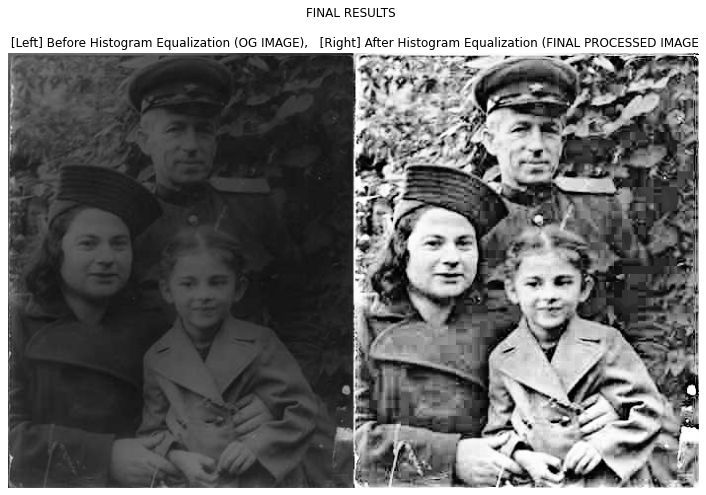

In [91]:

if(len(pic_mod.shape)<3): #Check if image is Grayscale
  equalized_image = histogram_equalization_1channel(pic_mod)
else:
  equalized_image = histogram_equalization_3channel(pic_mod)
compare_res = np.concatenate((img, equalized_image),axis=1)
plt.imshow(compare_res);plt.axis('off');
plt.title('FINAL RESULTS \n\n [Left] Before Histogram Equalization (OG IMAGE),   [Right] After Histogram Equalization (FINAL PROCESSED IMAGE')
plt.show